In [1]:
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline

In [2]:
filename = './data/Q1/MNIST_Subset.h5'
f = h5py.File(filename, 'r')
X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in the dataset: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)
print(X.shape)

Number of samples in the dataset:  14251
Distribution of samples among different classes:  [7293 6958]
(14251, 28, 28)


In [3]:
X = np.vstack([img.reshape(-1, ) for img in X])
print(X.shape)

(14251, 784)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(z):
    return z * (1.0 - z)


In [11]:
def train(X, y, n_nodes):
    m = X.shape[0]
    # n_layers = len(n_nodes)
    lr = 0.1

    y = np.reshape(y, (len(y), 1))

    w1 = np.zeros((len(X[0]), 100))  # input dim x nodes
    b1 = np.zeros((1, 100))

    w2 = np.zeros((100, 1))  # input dim x nodes
    b2 = np.zeros((1, 1))

    errors = []

    for i in tqdm(range(100)):
        # Forward Propagation
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        # print('Layer 1 output shape:', a1.shape)

        z2 = np.dot(a1, w2) + b2
        exp_scores = np.exp(z2)
        # print('here1')

        # print(a2.shape)
        exp_sum = np.sum(exp_scores, axis=1, keepdims=True) + 1
        a2 = exp_scores / exp_sum
        # break
        # print(exp_sum)

        # print(a2)

        # break

        # print('Layer 2 output shape:', a2.shape)

        # if len(np.where(a1 == 0)) == 0 and len(np.where(a1 == 1)) == 0:
        #     cost = np.sum(y * np.log(a2) + (1 - y) * (np.log(1 - a2)))
        #     if i % 100:
        #         print(cost, end=', ')

        # print('here2')

        # Backward Propagation
        error = y - a2

        # print('here 3')

        dw2 = np.dot(a1.T, error)
        db2 = np.sum(error)

        # print('here 4')

        delta = np.dot(error, w2.T) * sigmoid_prime(a1)
        dw1 = np.dot(X.T, delta)
        db1 = np.sum(delta)

        # print('here 5')

        # print(error)
        error = np.mean(np.abs(error[:, 0]))
        errors.append(error)

        # Update Weights
        w2 += -lr * dw2
        b2 += -lr * db2
        w1 += -lr * dw1
        b1 += -lr * db1

    return w1, b1, w2, b2, errors


In [12]:
w1, b1, w2, b2, errors = train(X_train, y_train, 0)
accuracy = (1 - errors[-1]) * 100


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:16,  5.83it/s]

  2%|▏         | 2/100 [00:00<00:17,  5.63it/s]

  3%|▎         | 3/100 [00:00<00:23,  4.16it/s]

  4%|▍         | 4/100 [00:01<00:27,  3.45it/s]

  5%|▌         | 5/100 [00:01<00:29,  3.18it/s]

  6%|▌         | 6/100 [00:01<00:31,  2.95it/s]

  7%|▋         | 7/100 [00:02<00:34,  2.73it/s]

  8%|▊         | 8/100 [00:02<00:34,  2.63it/s]

  9%|▉         | 9/100 [00:03<00:32,  2.83it/s]

 10%|█         | 10/100 [00:03<00:30,  2.98it/s]

 11%|█         | 11/100 [00:03<00:28,  3.10it/s]

 12%|█▏        | 12/100 [00:03<00:27,  3.19it/s]

 13%|█▎        | 13/100 [00:04<00:26,  3.26it/s]

 14%|█▍        | 14/100 [00:04<00:26,  3.30it/s]

 15%|█▌        | 15/100 [00:04<00:25,  3.34it/s]

 16%|█▌        | 16/100 [00:05<00:24,  3.36it/s]

 17%|█▋        | 17/100 [00:05<00:24,  3.38it/s]

 18%|█▊        | 18/100 [00:05<00:24,  3.39it/s]

 19%|█▉        | 19/100 [00:05<00:23,  3.40it/s]

 20%|██        | 20/100 [00:06<00:23,  3.41it/s]

 21%|██        | 21/100 [00:06<00:23,  3.41it/s]

 22%|██▏       | 22/100 [00:06<00:22,  3.41it/s]

 23%|██▎       | 23/100 [00:07<00:22,  3.42it/s]

 24%|██▍       | 24/100 [00:07<00:22,  3.42it/s]

 25%|██▌       | 25/100 [00:07<00:22,  3.38it/s]

 26%|██▌       | 26/100 [00:08<00:21,  3.39it/s]

 27%|██▋       | 27/100 [00:08<00:21,  3.40it/s]

 28%|██▊       | 28/100 [00:08<00:21,  3.41it/s]

 29%|██▉       | 29/100 [00:08<00:20,  3.41it/s]

 30%|███       | 30/100 [00:09<00:20,  3.41it/s]

 31%|███       | 31/100 [00:09<00:20,  3.41it/s]

 32%|███▏      | 32/100 [00:09<00:19,  3.42it/s]

 33%|███▎      | 33/100 [00:10<00:19,  3.42it/s]

 34%|███▍      | 34/100 [00:10<00:19,  3.42it/s]

 35%|███▌      | 35/100 [00:10<00:18,  3.43it/s]

 36%|███▌      | 36/100 [00:10<00:18,  3.43it/s]

 37%|███▋      | 37/100 [00:11<00:18,  3.43it/s]

 38%|███▊      | 38/100 [00:11<00:18,  3.42it/s]

 39%|███▉      | 39/100 [00:11<00:17,  3.42it/s]

 40%|████      | 40/100 [00:12<00:17,  3.43it/s]

 41%|████      | 41/100 [00:12<00:17,  3.43it/s]

 42%|████▏     | 42/100 [00:12<00:16,  3.42it/s]

 43%|████▎     | 43/100 [00:13<00:16,  3.43it/s]

 44%|████▍     | 44/100 [00:13<00:16,  3.43it/s]

 45%|████▌     | 45/100 [00:13<00:16,  3.42it/s]

 46%|████▌     | 46/100 [00:13<00:15,  3.40it/s]

 47%|████▋     | 47/100 [00:14<00:15,  3.41it/s]

 48%|████▊     | 48/100 [00:14<00:15,  3.35it/s]

 49%|████▉     | 49/100 [00:14<00:15,  3.38it/s]

 50%|█████     | 50/100 [00:15<00:14,  3.39it/s]

 51%|█████     | 51/100 [00:15<00:14,  3.40it/s]

 52%|█████▏    | 52/100 [00:15<00:14,  3.41it/s]

 53%|█████▎    | 53/100 [00:15<00:13,  3.41it/s]

 54%|█████▍    | 54/100 [00:16<00:13,  3.42it/s]

 55%|█████▌    | 55/100 [00:16<00:13,  3.42it/s]

 56%|█████▌    | 56/100 [00:16<00:12,  3.43it/s]

 57%|█████▋    | 57/100 [00:17<00:12,  3.43it/s]

 58%|█████▊    | 58/100 [00:17<00:12,  3.43it/s]

 59%|█████▉    | 59/100 [00:17<00:11,  3.42it/s]

 60%|██████    | 60/100 [00:17<00:11,  3.43it/s]

 61%|██████    | 61/100 [00:18<00:11,  3.43it/s]

 62%|██████▏   | 62/100 [00:18<00:11,  3.43it/s]

 63%|██████▎   | 63/100 [00:18<00:10,  3.42it/s]

 64%|██████▍   | 64/100 [00:19<00:10,  3.43it/s]

 65%|██████▌   | 65/100 [00:19<00:10,  3.43it/s]

 66%|██████▌   | 66/100 [00:19<00:10,  3.37it/s]

 67%|██████▋   | 67/100 [00:20<00:09,  3.39it/s]

 68%|██████▊   | 68/100 [00:20<00:09,  3.40it/s]

 69%|██████▉   | 69/100 [00:20<00:09,  3.41it/s]

 70%|███████   | 70/100 [00:20<00:08,  3.42it/s]

 71%|███████   | 71/100 [00:21<00:08,  3.42it/s]

 72%|███████▏  | 72/100 [00:21<00:08,  3.42it/s]

 73%|███████▎  | 73/100 [00:21<00:07,  3.42it/s]

 74%|███████▍  | 74/100 [00:22<00:07,  3.42it/s]

 75%|███████▌  | 75/100 [00:22<00:07,  3.42it/s]

 76%|███████▌  | 76/100 [00:22<00:07,  3.43it/s]

 77%|███████▋  | 77/100 [00:22<00:06,  3.42it/s]

 78%|███████▊  | 78/100 [00:23<00:06,  3.43it/s]

 79%|███████▉  | 79/100 [00:23<00:06,  3.43it/s]

 80%|████████  | 80/100 [00:23<00:05,  3.43it/s]

 81%|████████  | 81/100 [00:24<00:05,  3.43it/s]

 82%|████████▏ | 82/100 [00:24<00:05,  3.43it/s]

 83%|████████▎ | 83/100 [00:24<00:04,  3.42it/s]

 84%|████████▍ | 84/100 [00:25<00:04,  3.43it/s]

 85%|████████▌ | 85/100 [00:25<00:04,  3.43it/s]

 86%|████████▌ | 86/100 [00:25<00:04,  3.42it/s]

 87%|████████▋ | 87/100 [00:25<00:03,  3.40it/s]

 88%|████████▊ | 88/100 [00:26<00:03,  3.41it/s]

 89%|████████▉ | 89/100 [00:26<00:03,  3.41it/s]

 90%|█████████ | 90/100 [00:26<00:02,  3.41it/s]

 91%|█████████ | 91/100 [00:27<00:02,  3.42it/s]

 92%|█████████▏| 92/100 [00:27<00:02,  3.42it/s]

 93%|█████████▎| 93/100 [00:27<00:02,  3.43it/s]

 94%|█████████▍| 94/100 [00:27<00:01,  3.40it/s]

 95%|█████████▌| 95/100 [00:28<00:01,  3.33it/s]

 96%|█████████▌| 96/100 [00:28<00:01,  3.34it/s]

 97%|█████████▋| 97/100 [00:28<00:00,  3.37it/s]

 98%|█████████▊| 98/100 [00:29<00:00,  3.34it/s]

 99%|█████████▉| 99/100 [00:29<00:00,  3.33it/s]

100%|██████████| 100/100 [00:29<00:00,  3.35it/s]

Training Accuracy -697.86%
7.978634268956849


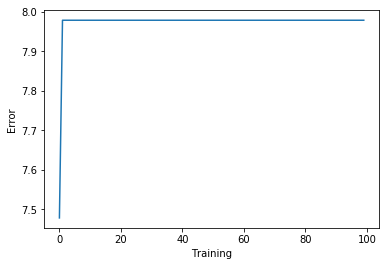

In [14]:
print("Training Accuracy " + str(np.round(accuracy, 2)) + "%")
print(errors[-1])
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()